In [1]:
import node
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/nuforc_reports.csv')
df.head(5)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


### Create Vect Obj

In [3]:
shapes = node.vect('shape')
shapes.set_up(list(df['shape']),True)
shapes.basic_stats(False) 
v=0
for p in np.unique(shapes.vector):
    v += shapes.pdf_from_mu_vect[p]
print(v)
#shapes.pdf()
print(shapes.pdf_from_mu_vect[14])


3.84
entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116
0.9999999999999999
0.09320385974782003


### Create Point & Apply KNN

In [4]:
state = node.vect('state')
state.set_up(list(df['state']),True)

x,y = state.create_corr_vectors(100,.09)
x = [abs(round(i,4)+1) for i in x]
y = [abs(round(i,4)+1) for i in y]

testNode = node.node(x[0],y[0],0,'test')
p = node.point(x, y,'shape_duration') 

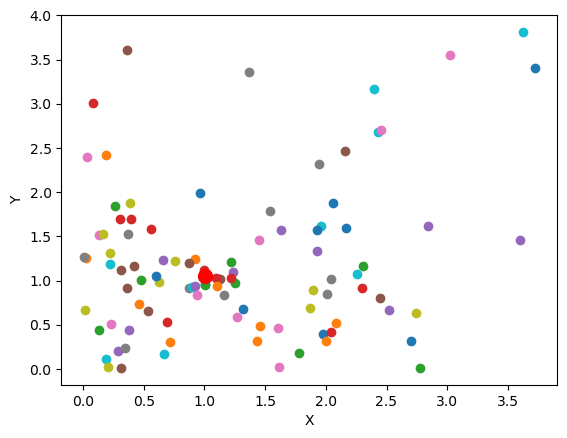

[(0.0, (2.7024999999999997, 0.3106), 2.7024999999999997),
 (0.3081, (2.7769, 0.011600000000000055), 2.7024999999999997),
 (0.3232, (2.7442, 0.6311), 2.7024999999999997),
 (0.4033, (2.5168, 0.6686000000000001), 2.7024999999999997),
 (0.5548, (2.4439, 0.8014), 2.7024999999999997)]

In [5]:
p.knn_predict(testNode)

### Create More Vects

In [6]:
time_seen = node.vect('time_seen')
time_seen.set_up(list(df['duration']),False,True)

In [7]:
time_seen.pdf_from_mu(True)

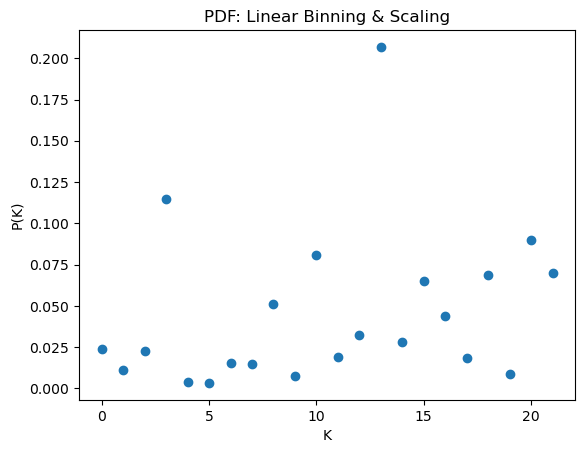

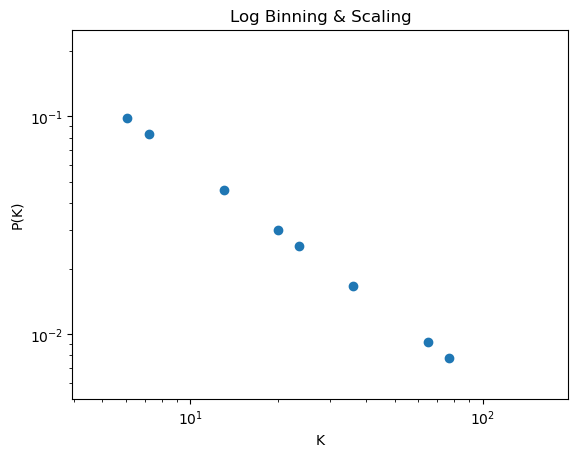

3.84


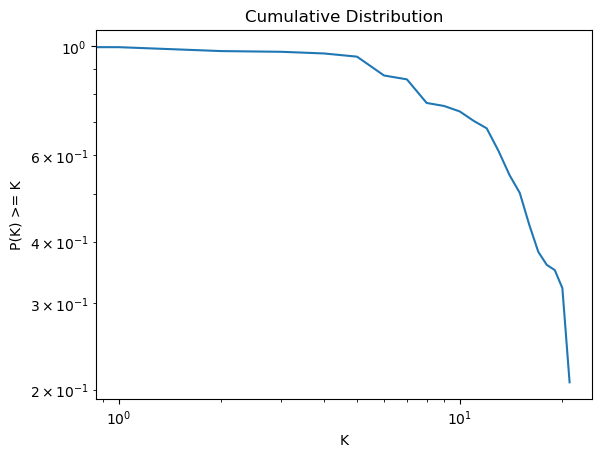

entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116


In [8]:
shapes.basic_stats(True)

### Linear Regression & Outlier Cleaning

m = 4.248484864437686 
b = 1272.851681841883


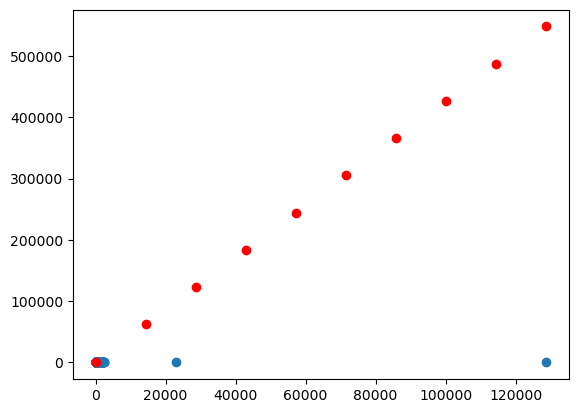

array([  1230.3668332 ,  62021.46470456, 122812.56257593, 183603.66044729,
       244394.75831866, 305185.85619002, 365976.95406139, 426768.05193275,
       487559.14980412, 548350.24767548])

In [9]:
p1 = node.point(time_seen.vector,shapes.vector,'shape_duration') 
p1.linear_regression()
# p2 = node.point(shapes.vector, state.vector,'shape_state') 
# p3 = node.point(state.vector, time_seen.vector,'state_duration') 

m = 6.162938885663805 
b = 12.233228634619536


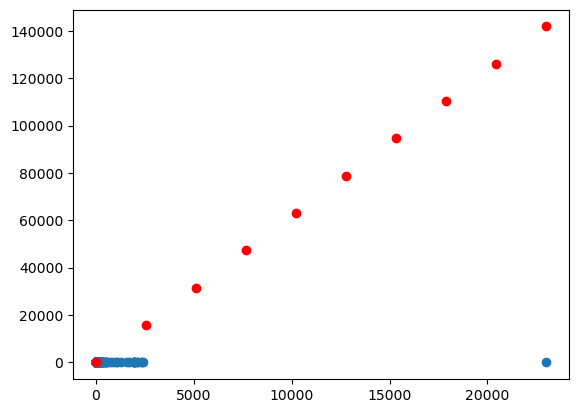

array([-4.93961602e+01,  1.57140320e+04,  3.14774601e+04,  4.72408882e+04,
        6.30043163e+04,  7.87677445e+04,  9.45311726e+04,  1.10294601e+05,
        1.26058029e+05,  1.41821457e+05])

In [10]:
# TODO: REMOVE extreme outliers
p1.remove_extreme_outlier()
p1.linear_regression()

m = 6.20469981238349 
b = -44.60732473627877


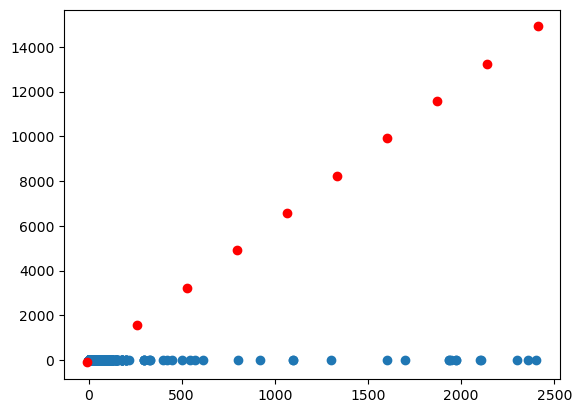

array([ -106.65432286,  1561.72051558,  3230.09535402,  4898.47019246,
        6566.8450309 ,  8235.21986934,  9903.59470779, 11571.96954623,
       13240.34438467, 14908.71922311])

In [11]:
p1.remove_extreme_outlier()
p1.linear_regression()

m = 2.1345725118025314 
b = -1.1345725118025314


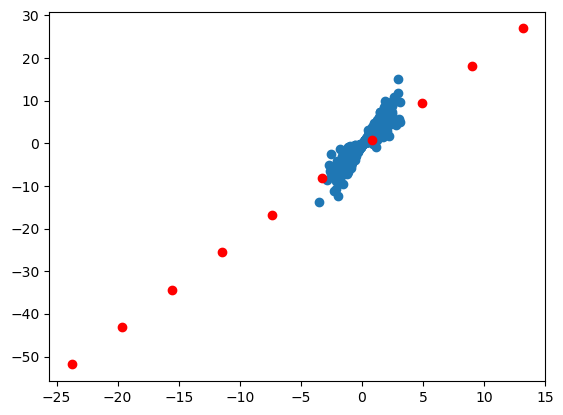

array([-51.86275489, -43.10623481, -34.34971473, -25.59319465,
       -16.83667457,  -8.08015449,   0.67636558,   9.43288566,
        18.18940574,  26.94592582])

In [12]:
x,y = shapes.create_corr_vectors(1000,3)
p2 = node.point(x,y,'corr_v') 
p2.linear_regression()

m = 2.1351667833174974 
b = -1.1351667833174974


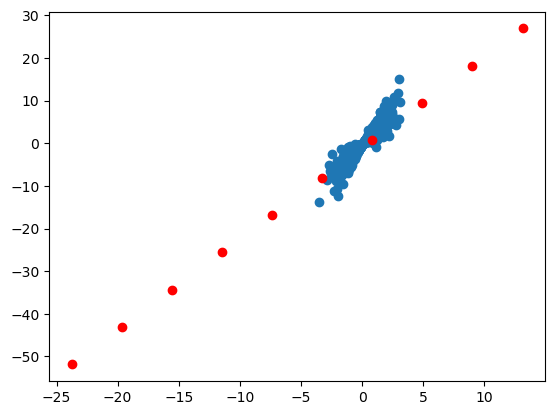

array([-51.87747204, -43.12428548, -34.37109891, -25.61791234,
       -16.86472577,  -8.1115392 ,   0.64164737,   9.39483394,
        18.14802051,  26.90120707])

In [13]:
p2.remove_extreme_outlier()
p2.linear_regression()

In [14]:
#shapes.basic_stats(False) 

def meow(x,mu,sigma):
    # f(x) = (1/σ√(2π)) * e^(-(x-μ)²/(2σ²))
    left  = (1/sigma * np.sqrt(2*np.pi))
    right = (np.exp(-(x-mu)**2)/(2*(sigma**2)))
    return left * right

print(meow(4005,4005.68,3993.43))

1.2393784530614984e-11
